In [1]:
%config Completer.use_jedi = False

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sb
import scipy

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, LinearSVR, SVR
from sklearn import tree


from sklearn.preprocessing import StandardScaler, PowerTransformer


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn import metrics


%matplotlib inline

### Loading the data

In [3]:
rawData = pd.read_csv('./data/forestfires.csv')

In [4]:
rawData.drop(labels=['rain'], axis = 1, inplace=True)

#### Create the Burn Flag

##### Add a flag column

##### 0 Burn = 0
##### Non 0 burn = 1

In [5]:
areaValues = rawData[['area']].values

In [6]:
areaFlag = []

for each in areaValues:
    
    if each[0] == 0:
        
        areaFlag.append(0)
        
    else:
        
        areaFlag.append(1)

In [7]:
rawData['burn'] = areaFlag

#### Train/Test split both the datasets

In [8]:
X, Y = rawData[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']], rawData[['burn']]

In [9]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.20, random_state=9892)

In [10]:
regressionData = XTrain[XTrain['area'] != 0]

In [11]:
regression_X, regression_Y = regressionData[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']], regressionData[['area']]

In [12]:
XTrain = XTrain.drop(columns=['area'])

In [13]:
XTest_Areas = XTest['area']

In [14]:
XTest = XTest.drop(columns=['area'])

### Classifications (Transformations)

In [15]:
pt = PowerTransformer()

pt.fit(XTrain)

XTrainPT = pt.transform(XTrain)

XTrainPT = pd.DataFrame(XTrainPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

XTestPT = pt.transform(XTest)

XTestPT = pd.DataFrame(XTestPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

In [16]:
sc = StandardScaler()

sc.fit(XTrain)

XTrainSC = sc.transform(XTrain)

XTrainSC = pd.DataFrame(XTrainSC, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

XTestSC = sc.transform(XTest)

XTestSC = pd.DataFrame(XTestSC, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

In [17]:
print ('Training Set: {} rows\n\nTest Set: {} rows'.format(XTrain.shape[0], XTest.shape[0]))

Training Set: 413 rows

Test Set: 104 rows


### Classification

In [18]:
def evaluateModel(model, XTest, YTest):
    
    prediction = None
    predictions = model.predict(XTest)

    print('Accuracy: ', accuracy_score(YTest, predictions))
    print("Precision:",precision_score(YTest, predictions))
    print("Recall:",recall_score(YTest, predictions))
    
    return predictions

In [19]:
def confusionMatrix(model, XTest, YTest):

    prediction = None
    predictions = model.predict(XTest)


    # Print the confusion matrix
    cm = confusion_matrix(YTest, predictions)

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize = 20)
    plt.colorbar()

    classNames = ['no burn', 'burn']

    tick_marks = np.arange(len(classNames))

    plt.xticks(tick_marks, classNames, fontsize = 20)
    plt.yticks(tick_marks, classNames, fontsize = 20)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('int'))

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      color = "white" if cm[i, j] > threshold else "black"
      plt.text(j, i, labels[i, j], horizontalalignment="center", color=color, fontsize = 20)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)
    plt.show()

In [20]:
def ROCCurve(model, XTest, YTest):

    YScores = model.predict_proba(XTest)

    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(YTest, YScores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(9, 9))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate', fontsize = 20)
    plt.ylabel('True Positive Rate', fontsize = 20)
    plt.title('ROC Curve', fontsize = 20)
    plt.show()

    auc = roc_auc_score(YTest,YScores[:,1])
    print('\nAUC: ' + str(auc))

GradientBoostingClassifier()


Accuracy:  0.5865384615384616
Precision: 0.5873015873015873
Recall: 0.6851851851851852


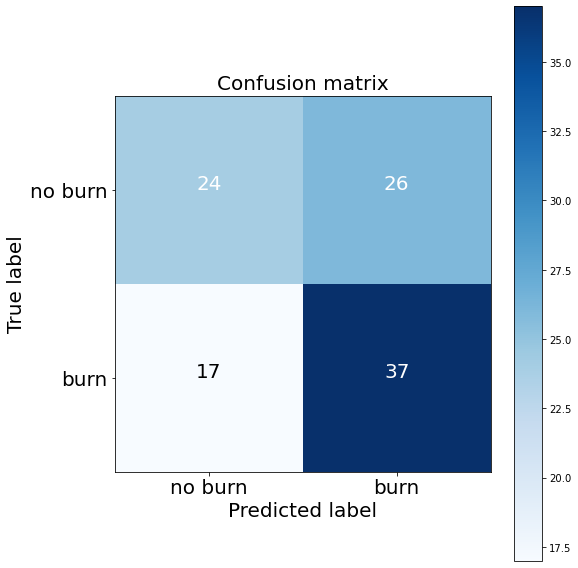

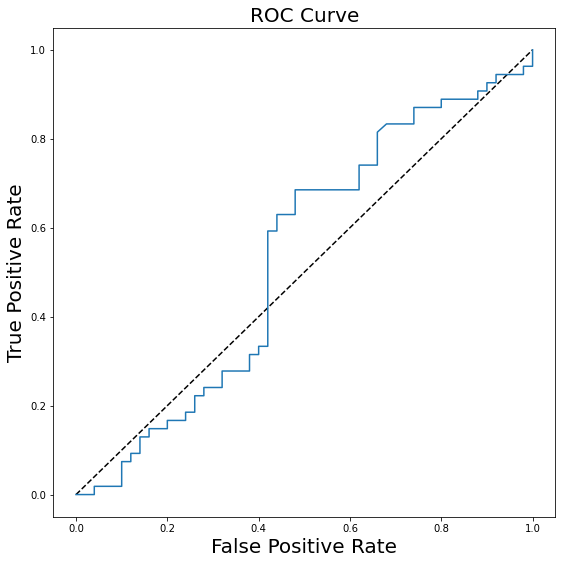


AUC: 0.5320370370370371


In [21]:
model = None
model = GradientBoostingClassifier().fit(XTrain, YTrain['burn'])

print (model)
print('\n')

predsGradBoost = evaluateModel(model, XTest, YTest)
confusionMatrix(model, XTest, YTest)
ROCCurve(model, XTest, YTest)

SVC(probability=True)


Accuracy:  0.5961538461538461
Precision: 0.5666666666666667
Recall: 0.9444444444444444


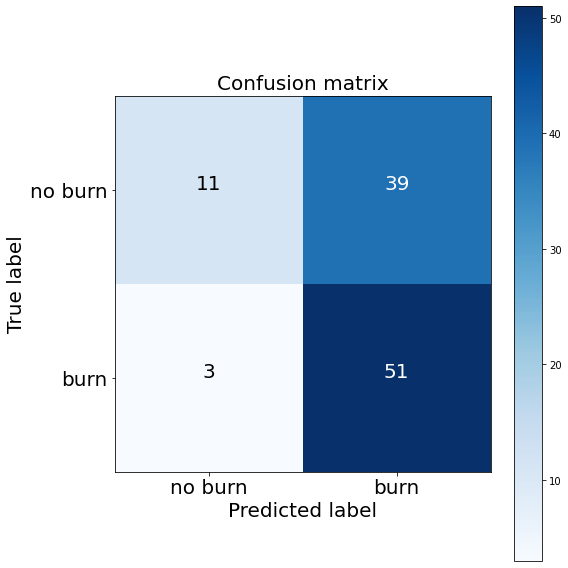

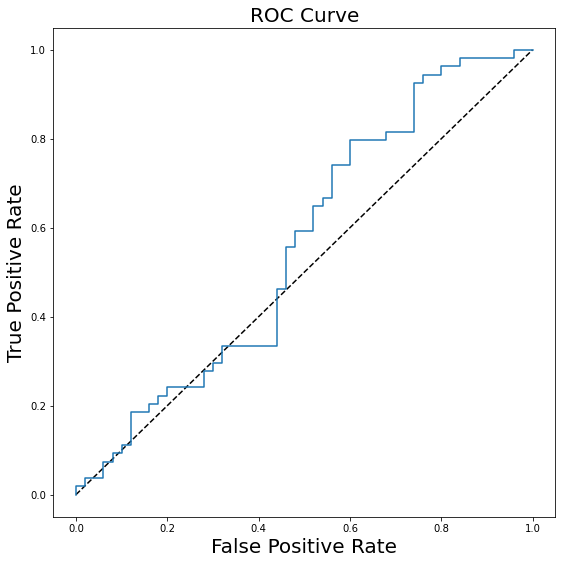


AUC: 0.5592592592592592


In [22]:
model = None
model = SVC(probability=True).fit(XTrain, YTrain['burn'])

print (model)
print('\n')

predsSVC = evaluateModel(model, XTest, YTest)
confusionMatrix(model, XTest, YTest)
ROCCurve(model, XTest, YTest)

In [23]:
XTest

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind
399,9,5,93.3,49.5,297.7,14.0,28.0,34,4.5
340,2,5,91.6,108.4,764.0,6.2,19.3,44,2.2
505,1,2,91.0,163.2,744.4,10.1,26.7,35,1.8
47,6,6,94.2,62.3,442.9,11.0,23.0,36,3.1
210,4,4,90.6,43.7,686.9,6.7,18.4,25,3.1
...,...,...,...,...,...,...,...,...,...
429,3,4,91.6,181.3,613.0,7.6,24.6,44,4.0
325,1,4,92.2,102.3,751.5,8.4,24.2,27,3.1
279,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5
150,6,5,92.5,56.4,433.3,7.1,23.2,39,5.4


In [24]:
predsSVC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
XTest

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind
399,9,5,93.3,49.5,297.7,14.0,28.0,34,4.5
340,2,5,91.6,108.4,764.0,6.2,19.3,44,2.2
505,1,2,91.0,163.2,744.4,10.1,26.7,35,1.8
47,6,6,94.2,62.3,442.9,11.0,23.0,36,3.1
210,4,4,90.6,43.7,686.9,6.7,18.4,25,3.1
...,...,...,...,...,...,...,...,...,...
429,3,4,91.6,181.3,613.0,7.6,24.6,44,4.0
325,1,4,92.2,102.3,751.5,8.4,24.2,27,3.1
279,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5
150,6,5,92.5,56.4,433.3,7.1,23.2,39,5.4


In [26]:
XTest['burnpred'] = predsGradBoost

In [27]:
XTest_Burns = XTest[XTest['burnpred'] == 1]

In [28]:
XTest_NoBurns = XTest[XTest['burnpred'] == 0]

In [29]:
XTest_Reg = XTest_Burns.drop(columns = ['burnpred'])

In [30]:
Burn_SVR = None
Burn_SVR = SVR()

Burn_SVR.fit(X = regression_X, y = regression_Y)

predictions = None
predictions = Burn_SVR.predict(XTest_Reg)

# regressionResults(YTest.values, predictions)
# residualPlots(YTest.values, predictions)

D:\Software\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
XTest_Burns['burnpred'] = predictions

<ipython-input-31-490e5294247c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTest_Burns['burnpred'] = predictions


In [32]:
XTest_Burns = XTest_Burns[['burnpred']].reset_index()

In [33]:
for index, row in XTest_Burns.iterrows():
    
    XTest.loc[row['index'], 'burnpred'] = row['burnpred']

In [34]:
def regressionResults(YTrue, predictions):

    # Regression metrics
    MAE=metrics.mean_absolute_error(YTrue, predictions) 
    RMSE=metrics.mean_squared_error(YTrue, predictions, squared=False) 
    r2=metrics.r2_score(YTrue, predictions)

    print('\nR Squared: ', round(r2,4))
    print('\nMAE: ', round(MAE,4))
    print('\nRMSE: ', round(RMSE,4))


def residualPlots(YTrue, predictions):

    plt.figure(figsize=(15,10))

    plt.subplot(2,2,1)
    sb.residplot(x = predictions, y = YTrue, lowess = True, line_kws={'color':'red'})
    plt.xlabel('Fitted Values')
    plt.title('Residual Plot')

    plt.subplot(2,2,2)
    residuals = YTrue - predictions
    scipy.stats.probplot(residuals, dist="norm", plot=plt)
    
    
    plt.subplot(2,2,3)
    plt.scatter(YTrue, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')


    plt.show()


R Squared:  -0.0157

MAE:  14.3449

RMSE:  74.1612


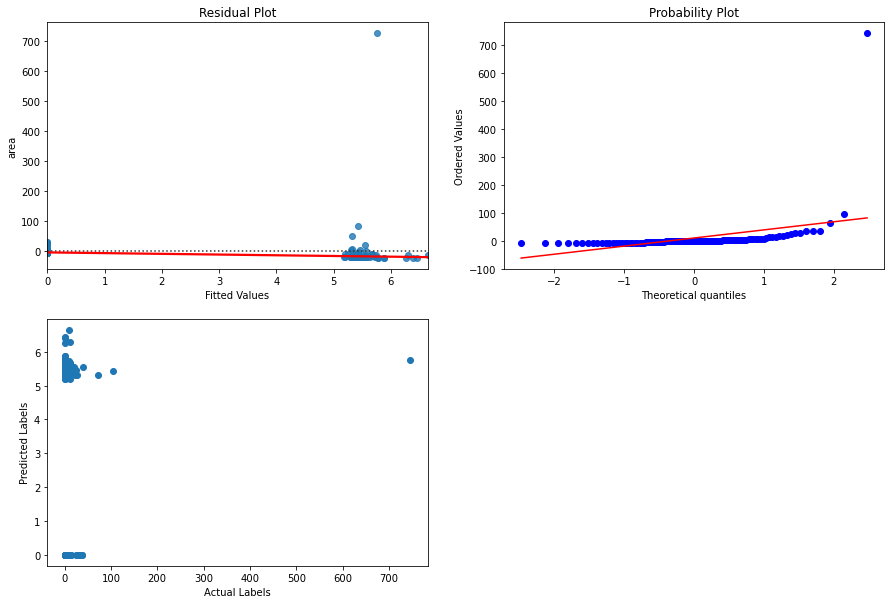

In [36]:
regressionResults(XTest_Areas, XTest['burnpred'])
residualPlots(XTest_Areas, XTest['burnpred'])